### <a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio 1.0 : Pandas:

1. Manejo de datos con pandas:

El siguiente [link](
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
), contiene un DataSet con informacion que permite predecir si un cancer es benigno o maligno. Un detalle del dataset es dado a continuación:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

1. Leer los datos desde un archivo en el git_hub.

Para el dataset realizar lo siguiente:

1. Leer los datos desde un archivo en el  git_hub.

2. Renombrar las columnas en PascalCase
  Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe

3. Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe,

4. Contabilizar la cantidad de null or nan en el dataframe, replazar por el valor medio de cada columna.

5. Encontrar los valores  diferentes en la columna Diagnosis, mostrar que es B y M. Emplear el metodo unique.

6. Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

  ```python
  import seaborn as sns
  sns.countplot?
  ```

7. Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.

8. Elimninar la columna id.

9. Normalizar cada columna respecto a su media y desviación estandar: (x-mean(x))/std(x)

10. En un mismo gráfico mostrar el histograma de la columna RadiusMean  para la etiqueta B y M en color naranja y azul de la columna Diagnosis respectivamente.

11. Para las columnas:
```python
cols=['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean']
```
realizar multiples histograma en un gráfico de [violin](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

10. Determinar los datos [outlier](https://en.wikipedia.org/wiki/Outlier)  para la columna RadiusMean y eliminarlos del data frame, para ello construya un gráfico tipo [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

```
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))
```
¿Qué informacion podemos obtener de este tipo de graficos?


Usar el rango intercuartílico (IQR): El IQR es la diferencia entre el tercer y el primer cuartil de los datos, es decir, el 75% y el 25% de los valores ordenados. Los valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de una columna llamada 'edad' usando el IQR, podemos hacer lo siguiente

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra forma de determinar los outlier es con el puntaje Z:
El puntaje Z es el número de desviaciones estándar que un valor está por encima o por debajo de la media. Los valores que tienen un puntaje Z mayor que un umbral (por ejemplo, 3) se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de la columna 'edad' usando el puntaje Z, podemos hacer lo siguiente:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

En un problema de machine learning se debe elegir todas las columnas y construir un algoritmo que permite obtener la mejor calidad de los datos sobre todas las columnas.


11. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

12. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



# Laboratorio 1.1: Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


```python
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


5. Para el data frame, seleccionemos solo los. datos del 2023.

5. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

6. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


Realiza gráfico análogo a esta (referencia)[https://seaborn.pydata.org/examples/kde_ridgeplot.html]















<!--
En este [link](http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt) se encuentra un
  data set que tiene información de la temperatura de la tierra desde 1850. Descripción de cada unas de las variables e información es detallada en el interior del archivo.


1. Leer el archivo de datos
2. Construir un dataframe con las columnas:

```
columns = ["Year","Month","MonthlyA","MonthlyUnc","AnnuealA","AnnuealUnc",\
           "FiveA","AnnuealUnc","TenA","AnnuealUnc","TwentyA","AnnuealUnc"]
```
3. Construir una nueva columna tipo string llamada Date con la informacion del Year y Month

4. Emplear el commando [datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) para dar el formato tipo date  a la nueva columna Date.
  
  ```
  df["Date"] = pd.to_datetime(df["Date"],format='%Y%m')
  ```
5. Emplear el metodo groupby and grouper para tomar los datos con un periodicidad mensual. Notese que freq permite variar la periodicidad con la que se quieren mostrar los datos. Pruebe para freq="2M", "3M", "Y", "H".

  ```
  T_serie = df.groupby(pd.Grouper(key='date', freq='M')).mean()
  ```


6. Realice un gráfico del tiempo como función de  MonthlyA.

7. ¿Que puede concluir? -->


Referencias

- [It’s Not Your Imagination. Summers Are Getting Hotter](https://www.nytimes.com/interactive/2021/climate/extreme-summer-heat.html)

- http://berkeleyearth.org/data/

- http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(f"https://raw.githubusercontent.com/gtorresa312/Curso_aprendizaje_estadistico/main/datasets/data_cancerWisconsin.csv")

2. Renombrar las columnas en PascalCase Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe

In [ ]:
def PascalCase(df):
  columnas = [i.split(' ') for i in [colum.replace('_',' ') for colum in df.columns]]
  col_m = [[j.capitalize() for j in cols] for cols in columnas]
  column_pascal = ["".join(p) for p in col_m]
  df.columns = column_pascal


PascalCase(df)

3. Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe,

In [ ]:
df.head()

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.tail()

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
df.describe

<bound method NDFrame.describe of            Id Diagnosis  RadiusMean  TextureMean  PerimeterMean  AreaMean  \
0      842302         M       17.99        10.38         122.80    1001.0   
1      842517         M       20.57        17.77         132.90    1326.0   
2    84300903         M       19.69        21.25         130.00    1203.0   
3    84348301         M       11.42        20.38          77.58     386.1   
4    84358402         M       20.29        14.34         135.10    1297.0   
..        ...       ...         ...          ...            ...       ...   
564    926424         M       21.56        22.39         142.00    1479.0   
565    926682         M       20.13        28.25         131.20    1261.0   
566    926954         M       16.60        28.08         108.30     858.1   
567    927241         M       20.60        29.33         140.10    1265.0   
568     92751         B        7.76        24.54          47.92     181.0   

     SmoothnessMean  CompactnessMean  Con

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     569 non-null    int64  
 1   Diagnosis              569 non-null    object 
 2   RadiusMean             569 non-null    float64
 3   TextureMean            569 non-null    float64
 4   PerimeterMean          569 non-null    float64
 5   AreaMean               569 non-null    float64
 6   SmoothnessMean         569 non-null    float64
 7   CompactnessMean        569 non-null    float64
 8   ConcavityMean          569 non-null    float64
 9   ConcavePointsMean      569 non-null    float64
 10  SymmetryMean           569 non-null    float64
 11  FractalDimensionMean   569 non-null    float64
 12  RadiusSe               569 non-null    float64
 13  TextureSe              569 non-null    float64
 14  PerimeterSe            569 non-null    float64
 15  AreaSe

4. Contabilizar la cantidad de null or nan en el dataframe, replazar por el valor medio de cada columna.

Cantidad de null en el dataframe

In [ ]:
df.isnull().sum()

Id                         0
Diagnosis                  0
RadiusMean                 0
TextureMean                0
PerimeterMean              0
AreaMean                   0
SmoothnessMean             0
CompactnessMean            0
ConcavityMean              0
ConcavePointsMean          0
SymmetryMean               0
FractalDimensionMean       0
RadiusSe                   0
TextureSe                  0
PerimeterSe                0
AreaSe                     0
SmoothnessSe               0
CompactnessSe              0
ConcavitySe                0
ConcavePointsSe            0
SymmetrySe                 0
FractalDimensionSe         0
RadiusWorst                0
TextureWorst               0
PerimeterWorst             0
AreaWorst                  0
SmoothnessWorst            0
CompactnessWorst           0
ConcavityWorst             0
ConcavePointsWorst         0
SymmetryWorst              0
FractalDimensionWorst      0
Unnamed:32               569
dtype: int64

Cantidad de NaN en el dataframe

In [ ]:
df.isna().sum()

Id                         0
Diagnosis                  0
RadiusMean                 0
TextureMean                0
PerimeterMean              0
AreaMean                   0
SmoothnessMean             0
CompactnessMean            0
ConcavityMean              0
ConcavePointsMean          0
SymmetryMean               0
FractalDimensionMean       0
RadiusSe                   0
TextureSe                  0
PerimeterSe                0
AreaSe                     0
SmoothnessSe               0
CompactnessSe              0
ConcavitySe                0
ConcavePointsSe            0
SymmetrySe                 0
FractalDimensionSe         0
RadiusWorst                0
TextureWorst               0
PerimeterWorst             0
AreaWorst                  0
SmoothnessWorst            0
CompactnessWorst           0
ConcavityWorst             0
ConcavePointsWorst         0
SymmetryWorst              0
FractalDimensionWorst      0
Unnamed:32               569
dtype: int64

Como todos los datos de la columna Unnamed:32 corresponden a un null o un NaN. Borramos la columna



In [ ]:
df=df.drop('Unnamed:32',axis=1)

5. Encontrar los valores diferentes en la columna Diagnosis, mostrar que es B y M. Emplear el metodo unique.

In [ ]:
print('valores diferentes en la columna Diagnosis:', list(df.Diagnosis.unique()))

valores diferentes en la columna Diagnosis: ['M', 'B']


6. Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

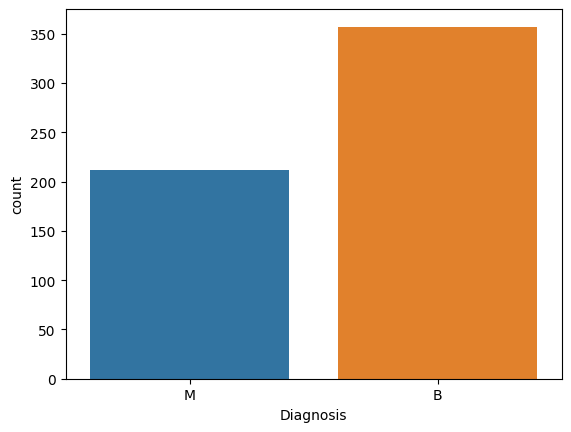

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["Diagnosis"])
plt.show()

7. Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.

In [ ]:
df.insert(2,'DiagnosisNumeric',np.multiply(df['Diagnosis'] == 'B',1))

In [ ]:
df

,Id,Diagnosis,DiagnosisNumeric,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,842302,M,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


8. Elimninar la columna id.

In [ ]:
df = df.drop('Id',axis=1)

In [ ]:
df

,Diagnosis,DiagnosisNumeric,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,M,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


9. Normalizar cada columna respecto a su media y desviación estandar: (x-mean(x))/std(x)

In [ ]:

for i in df.columns[2:len(df.columns)]:
  df[i] = (df[i]-df[i].mean())/df[i].std()


In [ ]:
df

,Diagnosis,DiagnosisNumeric,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,M,0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,M,0,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,M,0,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,M,0,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,M,0,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,M,0,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,M,0,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,M,0,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


10. En un mismo gráfico mostrar el histograma de la columna RadiusMean para la etiqueta B y M en color naranja y azul de la columna Diagnosis respectivamente.

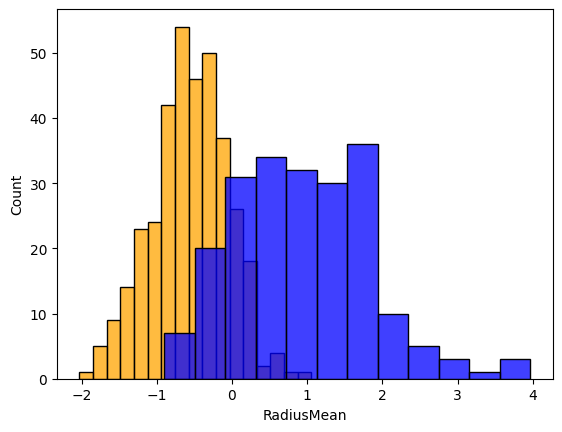

In [ ]:
M_diagnosis = df['Diagnosis'] == 'M'
B_diagnosis = df['Diagnosis'] == 'B'

sns.histplot(df[B_diagnosis]['RadiusMean'],color='orange')
sns.histplot(df[M_diagnosis]['RadiusMean'],color='blue')
plt.show()

Pordemos normalizar respecto al máximo para que los datos sean coherentes

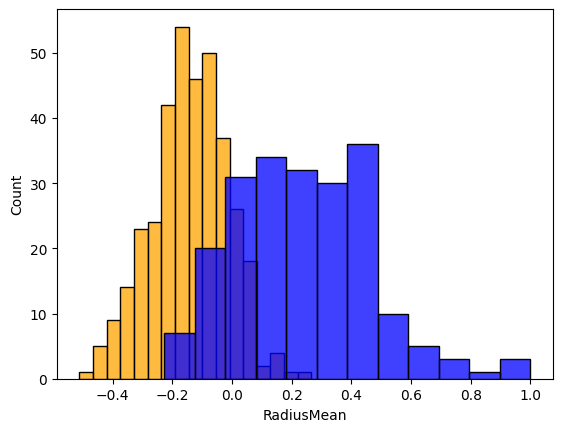

In [ ]:
for i in df.columns[2:len(df.columns)]:
  df[i] = df[i]/df[i].max()

M_diagnosis = df['Diagnosis'] == 'M'
B_diagnosis = df['Diagnosis'] == 'B'

sns.histplot(df[B_diagnosis]['RadiusMean'],color='orange')
sns.histplot(df[M_diagnosis]['RadiusMean'],color='blue')
plt.show()

11. Para las columnas:
```python
cols=['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean']
```
realizar multiples histograma en un gráfico de [violin](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

In [ ]:
import matplotlib.pyplot as plt

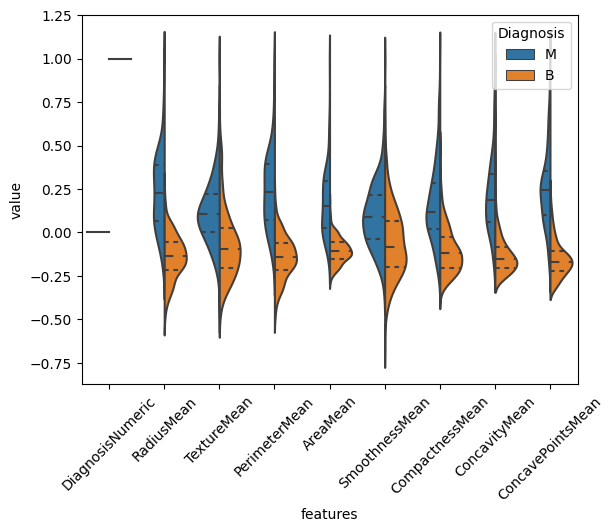

In [ ]:


data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)
plt.show()

11. Determinar los datos [outlier](https://en.wikipedia.org/wiki/Outlier)  para la columna RadiusMean y eliminarlos del data frame, para ello construya un gráfico tipo [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

```
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))
```

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

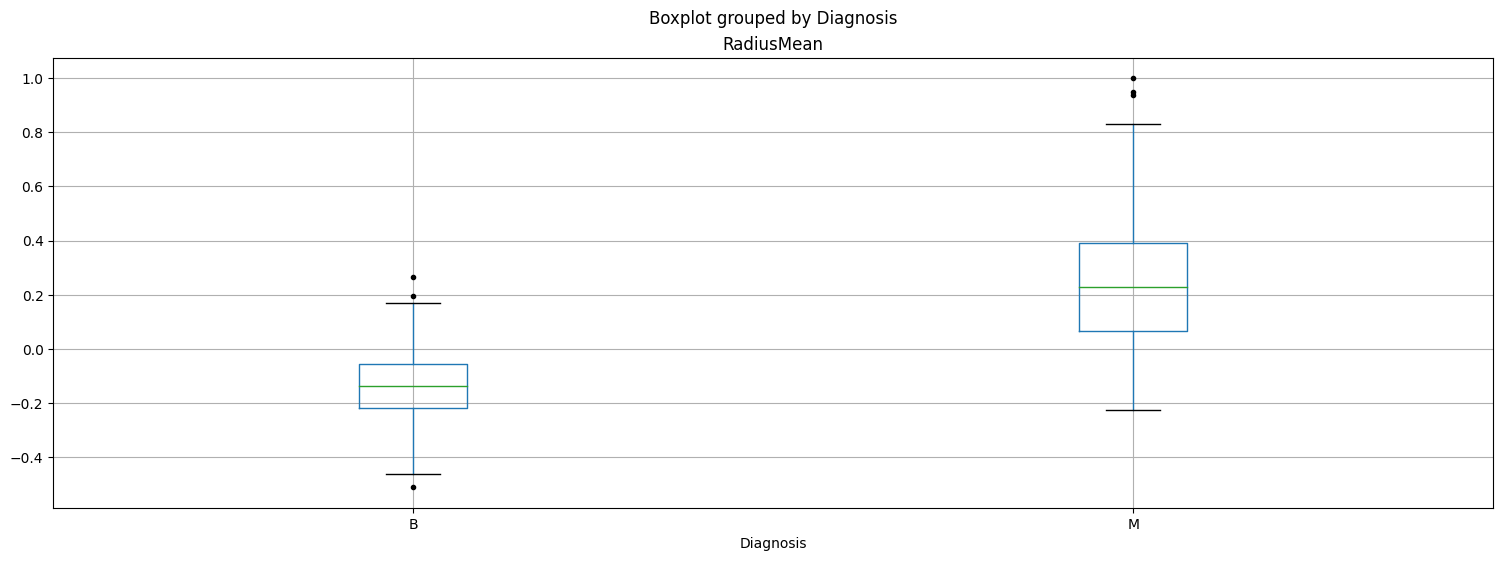

In [ ]:
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))


In [ ]:
Q1 = df['RadiusMean'].quantile(0.25)
Q3 = df['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['RadiusMean'] < (Q1 - 1.5 * IQR)) | (df['RadiusMean'] > (Q3 + 1.5 * IQR)))]

12. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

In [ ]:
df.corr()

<ipython-input-25-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,DiagnosisNumeric,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
DiagnosisNumeric,1.000000,-0.736130,-0.405823,-0.752666,-0.739385,-0.343556,-0.581711,-0.697194,-0.789120,-0.325255,...,-0.785969,-0.457294,-0.796740,-0.760593,-0.418750,-0.581712,-0.648523,-0.787780,-0.425713,-0.332106
RadiusMean,-0.736130,1.000000,0.314082,0.997415,0.991844,0.116048,0.450321,0.613406,0.782439,0.126253,...,0.966272,0.307496,0.960458,0.933921,0.098719,0.391411,0.498559,0.717409,0.184851,0.011030
TextureMean,-0.405823,0.314082,1.000000,0.321311,0.320911,-0.035676,0.222032,0.292914,0.281380,0.063424,...,0.343516,0.913214,0.351206,0.339827,0.068696,0.268944,0.285711,0.275646,0.107697,0.118395
PerimeterMean,-0.752666,0.997415,0.321311,1.000000,0.989681,0.155953,0.508646,0.659445,0.816598,0.164749,...,0.966913,0.315332,0.967301,0.934248,0.132871,0.439901,0.540981,0.750026,0.214097,0.061035
AreaMean,-0.739385,0.991844,0.320911,0.989681,1.000000,0.117465,0.445023,0.621508,0.785963,0.133813,...,0.968950,0.311592,0.962077,0.954181,0.106183,0.376271,0.493651,0.706332,0.176504,0.012546
SmoothnessMean,-0.343556,0.116048,-0.035676,0.155953,0.117465,1.000000,0.646878,0.497525,0.543772,0.545198,...,0.173884,0.032286,0.199771,0.165813,0.808746,0.462150,0.414635,0.493590,0.401633,0.515038
CompactnessMean,-0.581711,0.450321,0.222032,0.508646,0.445023,0.646878,1.000000,0.878275,0.821510,0.599154,...,0.489604,0.243893,0.550466,0.463574,0.565294,0.867843,0.808299,0.804344,0.530866,0.720412
ConcavityMean,-0.697194,0.613406,0.292914,0.659445,0.621508,0.497525,0.878275,1.000000,0.907207,0.500927,...,0.638433,0.308748,0.684231,0.621158,0.454400,0.769365,0.895984,0.858515,0.448248,0.573045
ConcavePointsMean,-0.789120,0.782439,0.281380,0.816598,0.785963,0.543772,0.821510,0.907207,1.000000,0.470820,...,0.800009,0.300078,0.828782,0.776080,0.465355,0.673790,0.751088,0.912881,0.417062,0.414045
SymmetryMean,-0.325255,0.126253,0.063424,0.164749,0.133813,0.545198,0.599154,0.500927,0.470820,1.000000,...,0.173112,0.085710,0.208533,0.167062,0.416167,0.465787,0.419772,0.428250,0.705292,0.443187


<ipython-input-26-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

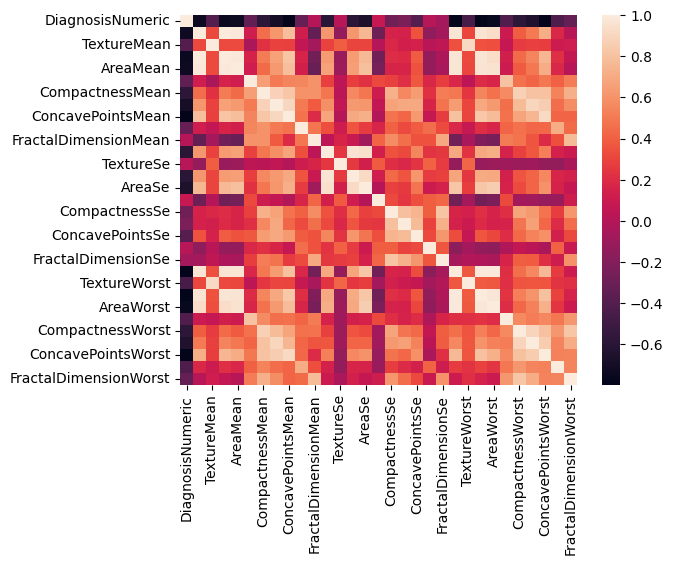

In [ ]:
sns.heatmap(df.corr())

# Laboratorio 1.1: Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


```python
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


5. Para el data frame, seleccionemos solo los. datos del 2023.

5. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

6. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


Realiza gráfico análogo a esta (referencia)[https://seaborn.pydata.org/examples/kde_ridgeplot.html]


1. Leer el dataset desde el github.

In [ ]:
df_time = pd.read_csv(f'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv')

2. Definir como indice la columna time

In [ ]:
df_time = df_time.set_index("time")

3. Obtenga información del data frame.

In [ ]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8+ KB


4. Determine si hay null, nan en el data frame.

In [ ]:
df_time.isnull().sum()

Unnamed: 0            0
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

In [ ]:
df_time.isna().sum()

Unnamed: 0            0
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

No hay null ni nan en las columnas


5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.

In [ ]:
PascalCase(df_time)

In [ ]:
df_time_new = df_time[['Close']]
df_time_new

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:

```python
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


In [ ]:

def Diff_Price(a):
  b = np.zeros(len(a))
  b[0]=0
  for i in range(1,len(a)):
    b[i]=a[i]-a[i-1]
  return b

df_time_new['DiffPrice'] = Diff_Price(df_time_new['Close'])


<ipython-input-34-94eb00f4f4e4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_new['DiffPrice'] = Diff_Price(df_time_new['Close'])


In [ ]:
df_time_new.index=pd.to_datetime(df_time_new.index)

In [ ]:
df_time_new.index

DatetimeIndex(['2022-07-25 13:00:00', '2022-07-25 14:00:00',
               '2022-07-25 15:00:00', '2022-07-25 16:00:00',
               '2022-07-25 17:00:00', '2022-07-25 18:00:00',
               '2022-07-25 19:00:00', '2022-07-25 20:00:00',
               '2022-07-25 21:00:00', '2022-07-25 22:00:00',
               ...
               '2023-05-12 14:00:00', '2023-05-12 15:00:00',
               '2023-05-12 16:00:00', '2023-05-12 17:00:00',
               '2023-05-12 18:00:00', '2023-05-12 19:00:00',
               '2023-05-12 20:00:00', '2023-05-12 21:00:00',
               '2023-05-12 22:00:00', '2023-05-12 23:00:00'],
              dtype='datetime64[ns]', name='time', length=5000, freq=None)

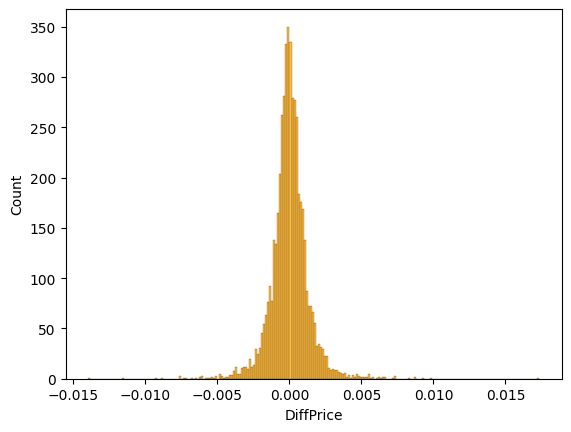

In [ ]:
sns.histplot(df_time_new['DiffPrice'],color='orange')
plt.show()

Se acotó el número de datos para poder fittear la distribución. Se usaron solo los valores donde la columna Time tomara solo valores del 2023

In [ ]:
# !pip install fitter
# from fitter import Fitter, get_common_distributions, get_distributions

# Mask_df = df_time_new.index > "2022-12-31 23:00:00"

# f = Fitter(df_time_new[['DiffPrice']][Mask_df],
#            distributions=['norminvgauss','genhyperbolic','alpha','invgauss','levy'])
# f.fit()
# f.summary()
# # Indentificamos la mejor distribucion con el error cuadratico medio
# f.get_best(method = 'sumsquare_error')
# # Indentificamos parametros de la distrubicion beta
# # f.fitted_param["beta"]


In [ ]:
Mask_df = df_time_new.index > "2022-12-31 23:00:00"
df_time_new = df_time_new[Mask_df]

Ejemplo de como funciona el groupby()

In [ ]:
x = np.linspace(0, 10, 11)
x1 = np.linspace(0, 10, 11)

In [ ]:
X = np.array([x, x1]).flatten()

In [ ]:
Y=np.linspace(0, 20, 22)
Y

array([ 0.        ,  0.95238095,  1.9047619 ,  2.85714286,  3.80952381,
        4.76190476,  5.71428571,  6.66666667,  7.61904762,  8.57142857,
        9.52380952, 10.47619048, 11.42857143, 12.38095238, 13.33333333,
       14.28571429, 15.23809524, 16.19047619, 17.14285714, 18.0952381 ,
       19.04761905, 20.        ])

In [ ]:
df_ejemplo = pd.DataFrame()


df_ejemplo['X']=X
df_ejemplo['Y']=Y


In [ ]:
df_ejemplo.groupby(by="X").mean()

,Y
X,
0.0,5.238095
1.0,6.190476
2.0,7.142857
3.0,8.095238
4.0,9.047619
5.0,10.000000
6.0,10.952381
7.0,11.904762
8.0,12.857143


5. Para el data frame, seleccionemos solo los. datos del 2023.

5. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

7. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


Realiza gráfico análogo a esta (referencia)[https://seaborn.pydata.org/examples/kde_ridgeplot.html]


In [ ]:
df_time_new.groupby(pd.Grouper(freq='15D')).mean()

,Close,DiffPrice
time,,
2023-01-02,1.069361,0.000047
2023-01-17,1.085565,0.000015
2023-02-01,1.077679,-0.000066
2023-02-16,1.063150,-0.000034
2023-03-03,1.063186,0.000026
2023-03-18,1.080936,0.000074
2023-04-02,1.093090,0.000063
2023-04-17,1.099084,-0.000006
2023-05-02,1.098889,-0.000059


In [ ]:
df_time_new.groupby(pd.Grouper(freq="1W")).mean()

,Close,DiffPrice
time,,
2023-01-08,1.059972,-0.000047
2023-01-15,1.076002,0.000156
2023-01-22,1.082041,0.000020
2023-01-29,1.088414,0.000010
2023-02-05,1.089281,-0.000062
2023-02-12,1.073363,-0.000097
2023-02-19,1.069648,0.000014
2023-02-26,1.063374,-0.000124
2023-03-05,1.060854,0.000073


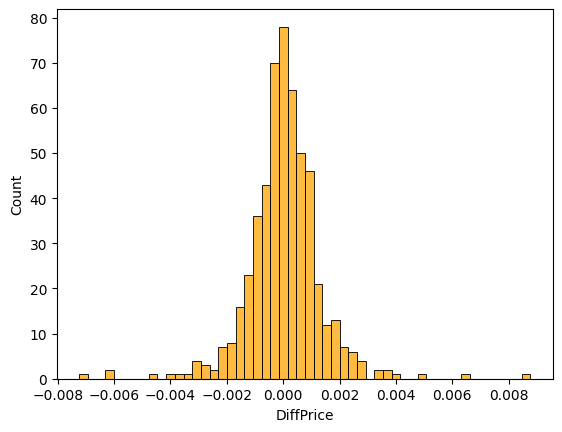

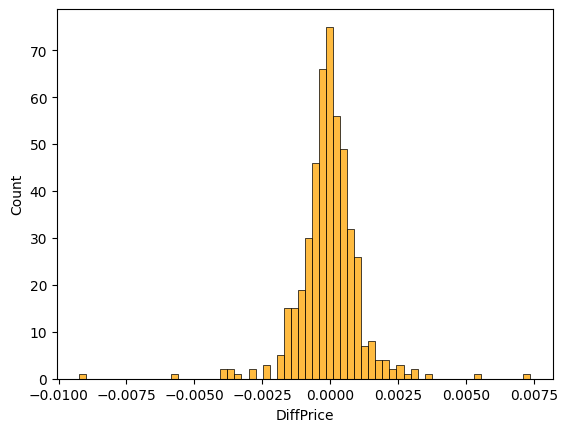

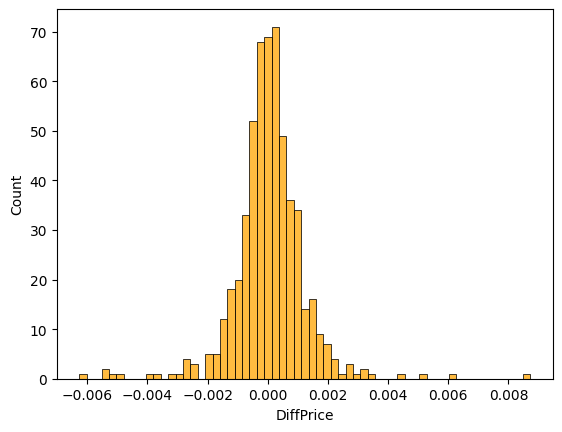

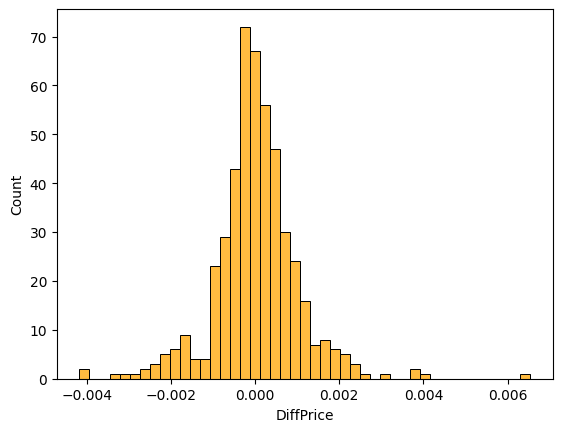

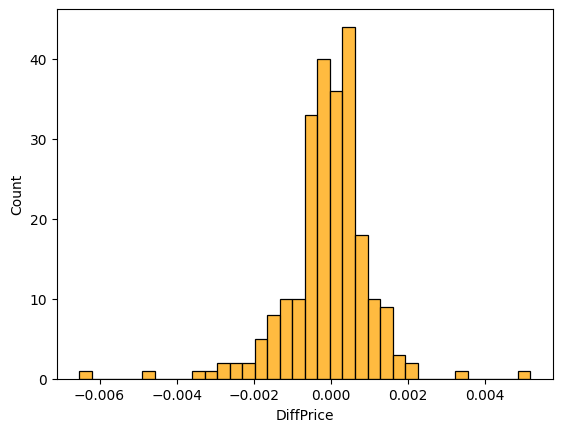

In [ ]:
q=df_time_new['DiffPrice'].groupby(pd.Grouper(freq="1M"))

for key_diff,diff_mes in list(q):
  sns.histplot(diff_mes,color='orange')
  plt.show()


In [ ]:
df_time_new_copy = df_time_new.drop('Close', axis = 1)

In [ ]:
df_time_new_copy['Clave']=df_time_new_copy.index.month


In [ ]:
df_time_new_copy

,DiffPrice,Clave
time,,
2023-01-02 00:00:00,-0.00200,1
2023-01-02 01:00:00,0.00169,1
2023-01-02 02:00:00,0.00093,1
2023-01-02 03:00:00,-0.00162,1
2023-01-02 04:00:00,-0.00016,1
...,...,...
2023-05-12 19:00:00,-0.00038,5
2023-05-12 20:00:00,0.00032,5
2023-05-12 21:00:00,-0.00015,5


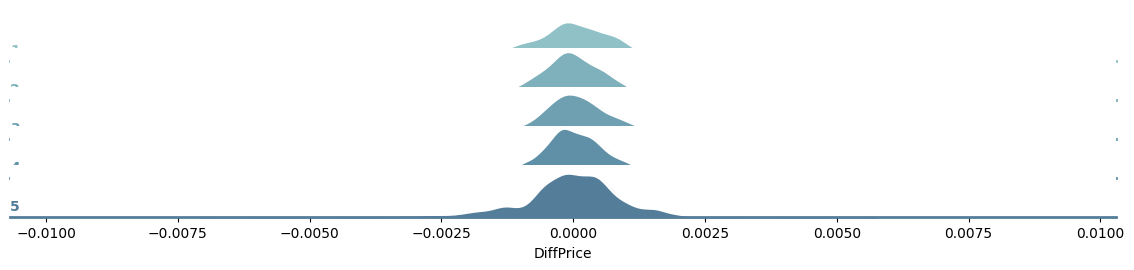

In [ ]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_time_new_copy, row="Clave", hue="Clave", aspect=20, height=.6, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "DiffPrice",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "DiffPrice", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "DiffPrice")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)